# Adversarial Attacks: CNN and GLRT under FGSM/PGD (L∞ and L2)

In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical

from preprocessing import load_steering_vectors
from cnn import load_doa_model
from adversarial_attacks import evaluate_attack_across_epsilons_doa
from doa import convert_signals_to_covariance_input

In [2]:
data = np.load('../data/processed/improved_doa_signals.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [3]:
steering_matrix, DoAs = load_steering_vectors(filepath='../data/original/steering_matrix.mat')

In [4]:
X_train_cov = convert_signals_to_covariance_input(X_train, turn_on_time=750, block_size=750)
X_test_cov = convert_signals_to_covariance_input(X_test, turn_on_time=750, block_size=750)
y_train_onehot = to_categorical(y_train, num_classes=61)
y_test_onehot = to_categorical(y_test, num_classes=61)

## Load Model

In [5]:
model = load_doa_model('cnn_doa_cov', load_dir='../models/noattack')

Model loaded from ../models/noattack/cnn_doa_cov.keras


In [6]:
model.evaluate(X_test_cov, y_test_onehot)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9765 - loss: 0.0430


[0.04314593970775604, 0.9767616391181946]

## Define Epsilon Values

In [7]:
epsilon_values_inf = np.linspace(0.0, 0.015, 20)
epsilon_values_l2 = np.linspace(0.0, 0.08, 20)

## Run Adversarial Attacks

### FGSM - L inf

In [8]:
cnn_fgsm_inf, glrt_fgsm_inf, cnn_preds_fgsm_inf, glrt_preds_fgsm_inf = evaluate_attack_across_epsilons_doa(
    model=model,
    X_test=X_test,
    y_test=y_test,
    steering_matrix=steering_matrix,
    epsilon_values=epsilon_values_inf,
    attack_type='fgsm',
    norm='inf',
    turn_on_time=750,
    cnn_block_size=750,
    tolerance=0
)

[FGSM-inf] Epsilon = 0.00000
[FGSM-inf] Epsilon = 0.00079
[FGSM-inf] Epsilon = 0.00158
[FGSM-inf] Epsilon = 0.00237
[FGSM-inf] Epsilon = 0.00316
[FGSM-inf] Epsilon = 0.00395
[FGSM-inf] Epsilon = 0.00474
[FGSM-inf] Epsilon = 0.00553
[FGSM-inf] Epsilon = 0.00632
[FGSM-inf] Epsilon = 0.00711
[FGSM-inf] Epsilon = 0.00789
[FGSM-inf] Epsilon = 0.00868
[FGSM-inf] Epsilon = 0.00947
[FGSM-inf] Epsilon = 0.01026
[FGSM-inf] Epsilon = 0.01105
[FGSM-inf] Epsilon = 0.01184
[FGSM-inf] Epsilon = 0.01263
[FGSM-inf] Epsilon = 0.01342
[FGSM-inf] Epsilon = 0.01421
[FGSM-inf] Epsilon = 0.01500


In [9]:
df_fgsm_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_fgsm_inf,
    "glrt_accuracy": glrt_fgsm_inf
})
df_fgsm_inf

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.976762,0.969640
1,0.000789,0.958583,0.958583
2,0.001579,0.898801,0.941717
3,0.002368,0.801537,0.928411
4,0.003158,0.717579,0.908358
5,0.003947,0.647864,0.888493
6,0.004737,0.583958,0.872939
7,0.005526,0.535795,0.851949
8,0.006316,0.495690,0.833208
9,0.007105,0.461207,0.815592


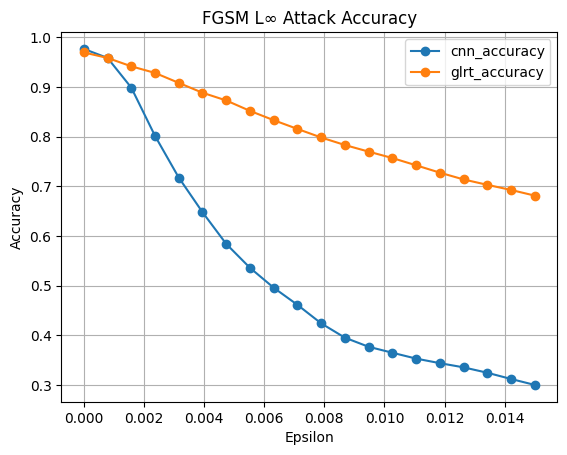

In [10]:
df_fgsm_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [11]:
df_fgsm_inf.to_csv("../results/improved_attacks/doa/fgsm_inf_accuracy.csv")

In [12]:
cnn_pred_df = pd.DataFrame(cnn_preds_fgsm_inf).T
glrt_pred_df = pd.DataFrame(glrt_preds_fgsm_inf).T
cnn_pred_df.to_csv("../results/improved_attacks/doa/fgsm_inf_cnn_predictions.csv")
glrt_pred_df.to_csv("../results/improved_attacks/doa/fgsm_inf_glrt_predictions.csv")

### FGSM - L2

In [13]:
cnn_fgsm_l2, glrt_fgsm_l2, cnn_preds_fgsm_l2, glrt_preds_fgsm_l2 = evaluate_attack_across_epsilons_doa(
    model=model,
    X_test=X_test,
    y_test=y_test,
    steering_matrix=steering_matrix,
    epsilon_values=epsilon_values_l2,
    attack_type='fgsm',
    norm='2',
    turn_on_time=750,
    cnn_block_size=750,
    tolerance=0
)

[FGSM-2] Epsilon = 0.00000
[FGSM-2] Epsilon = 0.00421
[FGSM-2] Epsilon = 0.00842
[FGSM-2] Epsilon = 0.01263
[FGSM-2] Epsilon = 0.01684
[FGSM-2] Epsilon = 0.02105
[FGSM-2] Epsilon = 0.02526
[FGSM-2] Epsilon = 0.02947
[FGSM-2] Epsilon = 0.03368
[FGSM-2] Epsilon = 0.03789
[FGSM-2] Epsilon = 0.04211
[FGSM-2] Epsilon = 0.04632
[FGSM-2] Epsilon = 0.05053
[FGSM-2] Epsilon = 0.05474
[FGSM-2] Epsilon = 0.05895
[FGSM-2] Epsilon = 0.06316
[FGSM-2] Epsilon = 0.06737
[FGSM-2] Epsilon = 0.07158
[FGSM-2] Epsilon = 0.07579
[FGSM-2] Epsilon = 0.08000


In [14]:
df_fgsm_l2 = pd.DataFrame({
    "epsilon": epsilon_values_l2,
    "cnn_accuracy": cnn_fgsm_l2,
    "glrt_accuracy": glrt_fgsm_l2
})
df_fgsm_l2

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.976762,0.969640
1,0.004211,0.964393,0.963456
2,0.008421,0.931784,0.956147
3,0.012632,0.860007,0.949963
4,0.016842,0.776612,0.940780
5,0.021053,0.698088,0.930285
6,0.025263,0.630997,0.921102
7,0.029474,0.583396,0.909670
8,0.033684,0.544978,0.899363
9,0.037895,0.518366,0.889618


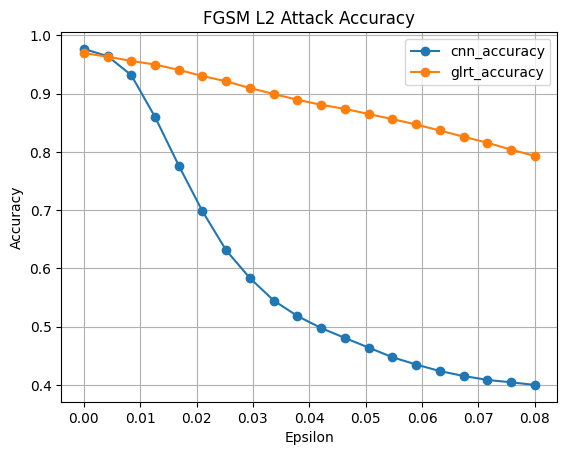

In [15]:
df_fgsm_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [16]:
df_fgsm_l2.to_csv("../results/improved_attacks/doa/fgsm_l2_accuracy.csv")

In [17]:
df_cnn_preds_fgsm_l2 = pd.DataFrame(cnn_preds_fgsm_l2).T
df_glrt_preds_fgsm_l2 = pd.DataFrame(glrt_preds_fgsm_l2).T
df_cnn_preds_fgsm_l2.to_csv("../results/improved_attacks/doa/fgsm_l2_cnn_predictions.csv")
df_glrt_preds_fgsm_l2.to_csv("../results/improved_attacks/doa/fgsm_l2_glrt_predictions.csv")

### PGD - L inf

In [18]:
cnn_pgd_inf, glrt_pgd_inf, cnn_preds_pgd_inf, glrt_preds_pgd_inf = evaluate_attack_across_epsilons_doa(
    model=model,
    X_test=X_test,
    y_test=y_test,
    steering_matrix=steering_matrix,
    epsilon_values=epsilon_values_inf,
    attack_type='pgd',
    norm='inf',
    turn_on_time=750,
    cnn_block_size=750,
    tolerance=0
)

[PGD-inf] Epsilon = 0.00000
[PGD-inf] Epsilon = 0.00079
[PGD-inf] Epsilon = 0.00158
[PGD-inf] Epsilon = 0.00237
[PGD-inf] Epsilon = 0.00316
[PGD-inf] Epsilon = 0.00395
[PGD-inf] Epsilon = 0.00474
[PGD-inf] Epsilon = 0.00553
[PGD-inf] Epsilon = 0.00632
[PGD-inf] Epsilon = 0.00711
[PGD-inf] Epsilon = 0.00789
[PGD-inf] Epsilon = 0.00868
[PGD-inf] Epsilon = 0.00947
[PGD-inf] Epsilon = 0.01026
[PGD-inf] Epsilon = 0.01105
[PGD-inf] Epsilon = 0.01184
[PGD-inf] Epsilon = 0.01263
[PGD-inf] Epsilon = 0.01342
[PGD-inf] Epsilon = 0.01421
[PGD-inf] Epsilon = 0.01500


In [19]:
df_pgd_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_pgd_inf,
    "glrt_accuracy": glrt_pgd_inf
})
df_pgd_inf

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.976762,0.969640
1,0.000789,0.957646,0.958583
2,0.001579,0.892429,0.943403
3,0.002368,0.785420,0.928036
4,0.003158,0.688906,0.912856
5,0.003947,0.603823,0.896927
6,0.004737,0.526424,0.876124
7,0.005526,0.468141,0.864318
8,0.006316,0.412294,0.849138
9,0.007105,0.365442,0.838268


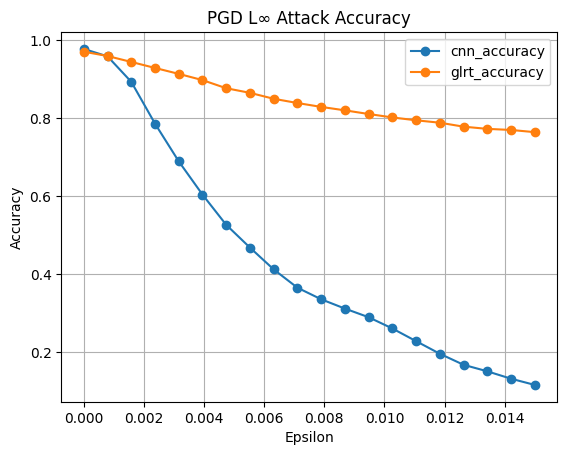

In [20]:
df_pgd_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [21]:
df_pgd_inf.to_csv("../results/improved_attacks/doa/pgd_inf_accuracy.csv")

In [22]:
df_cnn_preds_pgd_inf = pd.DataFrame(cnn_preds_pgd_inf).T
df_glrt_preds_pgd_inf = pd.DataFrame(glrt_preds_pgd_inf).T
df_cnn_preds_pgd_inf.to_csv("../results/improved_attacks/doa/pgd_inf_cnn_predictions.csv")
df_glrt_preds_pgd_inf.to_csv("../results/improved_attacks/doa/pgd_inf_glrt_predictions.csv")

### PGD - L2

In [23]:
cnn_pgd_l2, glrt_pgd_l2, cnn_preds_pgd_l2, glrt_preds_pgd_l2 = evaluate_attack_across_epsilons_doa(
    model=model,
    X_test=X_test,
    y_test=y_test,
    steering_matrix=steering_matrix,
    epsilon_values=epsilon_values_l2,
    attack_type='pgd',
    norm='2',
    turn_on_time=750,
    cnn_block_size=750,
    tolerance=0
)

[PGD-2] Epsilon = 0.00000
[PGD-2] Epsilon = 0.00421
[PGD-2] Epsilon = 0.00842
[PGD-2] Epsilon = 0.01263
[PGD-2] Epsilon = 0.01684
[PGD-2] Epsilon = 0.02105
[PGD-2] Epsilon = 0.02526
[PGD-2] Epsilon = 0.02947
[PGD-2] Epsilon = 0.03368
[PGD-2] Epsilon = 0.03789
[PGD-2] Epsilon = 0.04211
[PGD-2] Epsilon = 0.04632
[PGD-2] Epsilon = 0.05053
[PGD-2] Epsilon = 0.05474
[PGD-2] Epsilon = 0.05895
[PGD-2] Epsilon = 0.06316
[PGD-2] Epsilon = 0.06737
[PGD-2] Epsilon = 0.07158
[PGD-2] Epsilon = 0.07579
[PGD-2] Epsilon = 0.08000


In [24]:
df_pgd_l2 = pd.DataFrame({
    "epsilon": epsilon_values_l2,
    "cnn_accuracy": cnn_pgd_l2,
    "glrt_accuracy": glrt_pgd_l2
})
df_pgd_l2

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.976762,0.969640
1,0.004211,0.964393,0.963268
2,0.008421,0.930472,0.955960
3,0.012632,0.853448,0.950150
4,0.016842,0.761619,0.938531
5,0.021053,0.670165,0.928036
6,0.025263,0.593328,0.918103
7,0.029474,0.541979,0.907796
8,0.033684,0.501499,0.897676
9,0.037895,0.475075,0.887931


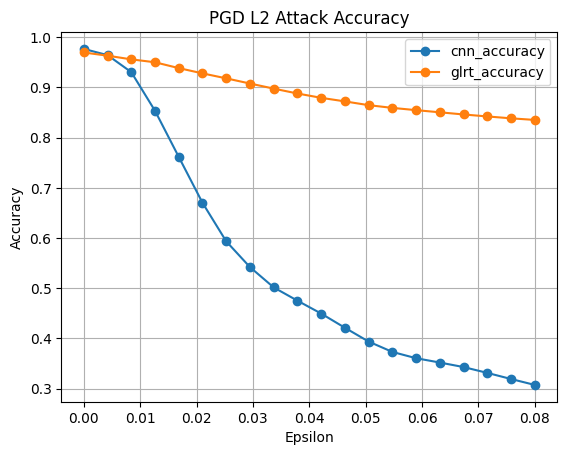

In [25]:
df_pgd_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [26]:
df_pgd_l2.to_csv("../results/improved_attacks/doa/pgd_l2_accuracy.csv")

In [27]:
df_cnn_preds_pgd_l2 = pd.DataFrame(cnn_preds_pgd_l2).T
df_glrt_preds_pgd_l2 = pd.DataFrame(glrt_preds_pgd_l2).T
df_cnn_preds_pgd_l2.to_csv("../results/improved_attacks/doa/pgd_l2_cnn_predictions.csv")
df_glrt_preds_pgd_l2.to_csv("../results/improved_attacks/doa/pgd_l2_glrt_predictions.csv")